<ipython-input-66-55ab2f2017cd>:21: RuntimeWarning: invalid value encountered in sqrt
  y2=((z0/z)**2-1)**(1/2)
<ipython-input-66-55ab2f2017cd>:32: RuntimeWarning: invalid value encountered in double_scalars
  F[1]=y-((z0/z)**2-1)**(1/2)
/Users/larryli/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-66-55ab2f2017cd>:41: RuntimeWarning: invalid value encountered in double_scalars
  F[1]=y-((z0/z)**2-1)**(1/2)


717.9665100666388

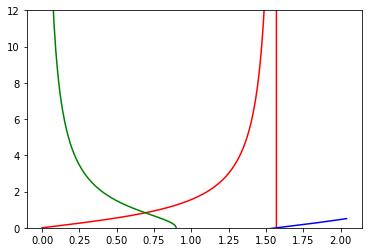

In [66]:

from numpy import *
from scipy.optimize import *
import math
import numpy as np
import matplotlib.pyplot as plt
m0=9.1*10**-31 #kg
m=0.063*m0 #conduction band 0.063m0, valance 0.51m0 
V= 0.242*1.6*10**-19 #1.6*10**-19J=1eV, 0.242V1, 0.153V2
a=10*0.283*10**-9  # 0.283nm/layer usually 30-40 monolayers
hbar=1.05*10**-34 
c=3*10**8 #m/s
Eg=1.43 #eV energy gap of GaAs
#Even Case
x=np.arange(10**-33,2*10**-19,10**-22)
k=(2*m*x)**(1/2)/hbar
z=k*a/2
z0=a/hbar*(m*V/2)**(1/2)
z
z0
y1=np.tan(z)
y2=((z0/z)**2-1)**(1/2)
y3=-1/np.tan(z)
plt.ylim([0,12])
plt.plot(z,y1,color='r') #even
plt.plot(z,y2,color='g')
plt.plot(z,y3,color='b') #odd
def myFunction(p):
    z=p[0]
    y=p[1]
    F=empty((2))
    F[0]=y-np.tan(z)
    F[1]=y-((z0/z)**2-1)**(1/2)
    return F
p=fsolve(myFunction,[1,1])

def myFunction2(p):
    z=p[0]
    y=p[1]
    F=empty((2))
    F[0]=y+1/np.tan(z)
    F[1]=y-((z0/z)**2-1)**(1/2)
    return F
p1=fsolve(myFunction2,[1,1])
p
x=2*p[0]**2*hbar**2/m/a**2/(1.6*10**-19) #energy level
E=x+Eg #recombination energy
#0.043eV for V1, 0.0075eV for V2
#E=hf=hc/(lambda) 
freq=E*1.6*10**-19/(6.625*10**-34)
lamda=c/freq
lamda=lamda*10**9
# lamda=6.625*10**-34/(2*m*x*1.6*10**-19)**(1/2)
lamda